# Phase 1

In [1]:
import pandas as pd 

In [2]:
dcc = pd.read_csv('TBN_CC_APPLY.csv')
dfx = pd.read_csv('TBN_FX_TXN.csv')
dln = pd.read_csv('TBN_LN_APPLY.csv')
dwm = pd.read_csv('TBN_WM_TXN.csv')
behav = pd.read_csv('work finish data/cust_behavior.csv')


cif =pd.read_csv('TBN_CIF.csv')

In [3]:
behav.shape

(195000, 5)

In [4]:
len(pd.unique(behav.iloc[:,0]))

195000

In [5]:
cif.head()

,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS
0,UFUIMEGMK2KTIWI4,1,NaN,2.0,NaN,NaN,NaN,NaN
1,3HJN2X_LGBHBKILI,3,0.0,9393.0,NaN,NaN,1.0,NaN
2,MNEZK2O3OE-JHYBW,4,0.0,2912.0,3.0,M,2.0,2.0
3,W7ADZSWYXEMHB7JQ,4,0.0,8332.0,5.0,M,2.0,1.0
4,ODB6BA6ORHL2UYZE,4,0.0,744.0,3.0,M,2.0,1.0


In [6]:
#因為是從別原本的寫好的程式幹來的
df=cif
df_arr=[]
for i in df.iloc[:,0]:
    df_arr.append(i)

In [7]:
# 比對答案卷裡面的資料，看有沒有缺的，有缺的就補上去，所以會有146消失的資料被捕進去 (optional)
answer=pd.read_csv('TBN_Y_ZERO.csv')
for i in answer.iloc[:,0]:
    if i not in df_arr:
        df=df.append({'CUST_NO':i},ignore_index=True)

df.tail(10)

,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS
187815,28XTW0QU6KSSLQ7O,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187816,CDPXJP3KOUURZPI0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187817,9HTHF1ZLFAC4UIF4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187818,OBKCWNDIACIIH67A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187819,CQVKAL3ZGPLULWTK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187820,KCM193NPIS5SMAEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187821,ZSILFFO-HJUZSJQC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187822,9Q9QBAA3VUAK8SBQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187823,4DFNV0HJDHEUADFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187824,JME4GMNUWSIDENMG,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# NaN 補 mode or mean
df['AGE'] =df['AGE'].fillna(df['AGE'].mode()[0])
df['CHILDREN_CNT'] =df['CHILDREN_CNT'].fillna(df['CHILDREN_CNT'].mode()[0])
df['CUST_START_DT'] =df['CUST_START_DT'].fillna(df['CUST_START_DT'].mean())
df['EDU_CODE'] =df['EDU_CODE'].fillna(df['EDU_CODE'].mode()[0])
df['GENDER_CODE'] =df['GENDER_CODE'].fillna(df['GENDER_CODE'].mode()[0])
df['INCOME_RANGE_CODE'] =df['INCOME_RANGE_CODE'].fillna(df['INCOME_RANGE_CODE'].mode()[0])
df['WORK_MTHS'] =df['WORK_MTHS'].fillna(df['WORK_MTHS'].mode()[0])

df.head()

,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS
0,UFUIMEGMK2KTIWI4,1.0,0.0,2.0,3.0,F,1.0,1.0
1,3HJN2X_LGBHBKILI,3.0,0.0,9393.0,3.0,F,1.0,1.0
2,MNEZK2O3OE-JHYBW,4.0,0.0,2912.0,3.0,M,2.0,2.0
3,W7ADZSWYXEMHB7JQ,4.0,0.0,8332.0,5.0,M,2.0,1.0
4,ODB6BA6ORHL2UYZE,4.0,0.0,744.0,3.0,M,2.0,1.0


In [9]:
#因為上面是從別的寫好的程式幹來的
cif=df

In [10]:
cif.shape

(187825, 8)

In [11]:
cif_c= cif.set_index('CUST_NO').join(behav.set_index('ID'),how='left')

In [12]:
cif_c = cif_c.rename(columns={'CreditCard':'CreditCard_b','ForEx':'ForEx_b','Trust':'Trust_b','Loan':'Loan_b'})

In [13]:
# count buy how many times of credit card
cc_g=dcc.groupby(['CUST_NO']).count()
cc_g = cc_g.rename(columns={'TXN_DT':'cc_BuyFreq'})

In [14]:
fx=dfx.drop(columns=['FX_TXN_AMT'])
fx_g=fx.groupby(['CUST_NO']).count()
fx_g = fx_g.rename(columns={'TXN_DT':'fx_BuyFreq'})

In [15]:
ln=dln.drop(columns=['LN_AMT','LN_USE'])
ln_g=ln.groupby(['CUST_NO']).count()
ln_g = ln_g.rename(columns={'TXN_DT':'ln_BuyFreq'})

In [16]:
wm=dwm.drop(columns=['CUST_RISK_CODE','INVEST_TYPE_CODE','WM_TXN_AMT'])
wm_g=wm.groupby(['CUST_NO']).count()
wm_g = wm_g.rename(columns={'TXN_DT':'wm_BuyFreq'})

In [17]:
cif_c= cif_c.join(cc_g,how='left')
cif_c= cif_c.join(fx_g,how='left')
cif_c= cif_c.join(ln_g,how='left')
cif_c= cif_c.join(wm_g,how='left')

In [18]:
cif_c=cif_c.fillna({'cc_BuyFreq':0,'fx_BuyFreq':0,'ln_BuyFreq':0,'wm_BuyFreq':0})
cif_c=cif_c.fillna({'CreditCard_b':0,'ForEx_b':0,'Trust_b':0,'Loan_b':0})

In [19]:
cif_c.shape

(187825, 15)

In [20]:
cif_c.to_csv('work finish data/cif_combine_browse.csv')

# Phase 2

In [21]:
df=pd.read_csv('work finish data/cif_combine_browse.csv',index_col=0)
df.tail()

,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq
CUST_NO,,,,,,,,,,,,,,,
KCM193NPIS5SMAEY,3.0,0.0,6260.023998,3.0,F,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZSILFFO-HJUZSJQC,3.0,0.0,6260.023998,3.0,F,1.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
9Q9QBAA3VUAK8SBQ,3.0,0.0,6260.023998,3.0,F,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4DFNV0HJDHEUADFA,3.0,0.0,6260.023998,3.0,F,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JME4GMNUWSIDENMG,3.0,0.0,6260.023998,3.0,F,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#新增特徵值 增加feature
df=df.assign(browse_c=(df['CreditCard_b']+df['ForEx_b']+df['Trust_b']+df['Loan_b']))
df=df.assign(freq_c=(df['cc_BuyFreq']+df['fx_BuyFreq']+df['ln_BuyFreq']+df['wm_BuyFreq']))

In [23]:
#轉換性別欄為
df.loc[df['GENDER_CODE'] ==0, 'GENDER_CODE'] = 'Male'
df.loc[df['GENDER_CODE'] ==1, 'GENDER_CODE'] = 'Female'

In [24]:
df2 = pd.get_dummies(df['GENDER_CODE'])
df2.head()

,F,M
CUST_NO,,
UFUIMEGMK2KTIWI4,1,0
3HJN2X_LGBHBKILI,1,0
MNEZK2O3OE-JHYBW,0,1
W7ADZSWYXEMHB7JQ,0,1
ODB6BA6ORHL2UYZE,0,1


In [25]:
#df.join合併資料
df=df.join(df2)

In [26]:
df.tail()

,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq,browse_c,freq_c,F,M
CUST_NO,,,,,,,,,,,,,,,,,,,
KCM193NPIS5SMAEY,3.0,0.0,6260.023998,3.0,F,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
ZSILFFO-HJUZSJQC,3.0,0.0,6260.023998,3.0,F,1.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,1,0
9Q9QBAA3VUAK8SBQ,3.0,0.0,6260.023998,3.0,F,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1,0
4DFNV0HJDHEUADFA,3.0,0.0,6260.023998,3.0,F,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
JME4GMNUWSIDENMG,3.0,0.0,6260.023998,3.0,F,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,0


In [27]:
#變成有買或是沒買 (optional)
df.loc[df['cc_BuyFreq']>0,'cc_BuyFreq']=1
df.loc[df['fx_BuyFreq']>0,'fx_BuyFreq']=1
df.loc[df['ln_BuyFreq']>0,'ln_BuyFreq']=1
df.loc[df['wm_BuyFreq']>0,'wm_BuyFreq']=1

In [28]:
df.tail()

,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq,browse_c,freq_c,F,M
CUST_NO,,,,,,,,,,,,,,,,,,,
KCM193NPIS5SMAEY,3.0,0.0,6260.023998,3.0,F,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
ZSILFFO-HJUZSJQC,3.0,0.0,6260.023998,3.0,F,1.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,1,0
9Q9QBAA3VUAK8SBQ,3.0,0.0,6260.023998,3.0,F,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1,0
4DFNV0HJDHEUADFA,3.0,0.0,6260.023998,3.0,F,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
JME4GMNUWSIDENMG,3.0,0.0,6260.023998,3.0,F,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,0


In [29]:
# sex -> male = 1 & female = 0
# df.loc[df['GENDER_CODE'] =='M', 'GENDER_CODE'] = 1
# df.loc[df['GENDER_CODE'] =='F', 'GENDER_CODE'] = 0

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns 
fig1,ax1=plt.subplots(figsize=(20,10))
ax1.set_title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.6f',ax=ax1)

In [31]:
df.to_csv('work finish data/cif_combine_browse.csv')

In [32]:
df.head()

,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq,browse_c,freq_c,F,M
CUST_NO,,,,,,,,,,,,,,,,,,,
UFUIMEGMK2KTIWI4,1.0,0.0,2.0,3.0,F,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3HJN2X_LGBHBKILI,3.0,0.0,9393.0,3.0,F,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
MNEZK2O3OE-JHYBW,4.0,0.0,2912.0,3.0,M,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14.0,0,1
W7ADZSWYXEMHB7JQ,4.0,0.0,8332.0,5.0,M,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
ODB6BA6ORHL2UYZE,4.0,0.0,744.0,3.0,M,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [33]:
#新增一個欄位 收入級距 / (小孩數+監護人)
df=df.assign(avg_income=(df['INCOME_RANGE_CODE']/(df['CHILDREN_CNT']+1)))

In [34]:
# df.to_csv('work finish data/cif_combine_browse.csv')

In [35]:
df.head()

,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq,browse_c,freq_c,F,M,avg_income
CUST_NO,,,,,,,,,,,,,,,,,,,,
UFUIMEGMK2KTIWI4,1.0,0.0,2.0,3.0,F,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1.0
3HJN2X_LGBHBKILI,3.0,0.0,9393.0,3.0,F,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1.0
MNEZK2O3OE-JHYBW,4.0,0.0,2912.0,3.0,M,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14.0,0,1,2.0
W7ADZSWYXEMHB7JQ,4.0,0.0,8332.0,5.0,M,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2.0
ODB6BA6ORHL2UYZE,4.0,0.0,744.0,3.0,M,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2.0


In [36]:
# 教育層  高中以上 = 1 高中以下 = 0
df.loc[df['EDU_CODE']<=3,'edu_cut'] =0
df.loc[df['EDU_CODE']>3,'edu_cut']=1 

# 切實際年齡 
df = df.assign(current_age=(round(abs(df['CUST_START_DT']-9447)/365)+df['AGE']*15))

# 擁有資產 
df = df.assign(assets = df['INCOME_RANGE_CODE']*df['WORK_MTHS'])

df.head()


,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,...,ln_BuyFreq,wm_BuyFreq,browse_c,freq_c,F,M,avg_income,edu_cut,current_age,assets
CUST_NO,,,,,,,,,,,,,,,,,,,,,
UFUIMEGMK2KTIWI4,1.0,0.0,2.0,3.0,F,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,1.0,0.0,41.0,1.0
3HJN2X_LGBHBKILI,3.0,0.0,9393.0,3.0,F,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,1.0,0.0,45.0,1.0
MNEZK2O3OE-JHYBW,4.0,0.0,2912.0,3.0,M,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14.0,0,1,2.0,0.0,78.0,4.0
W7ADZSWYXEMHB7JQ,4.0,0.0,8332.0,5.0,M,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,2.0,1.0,63.0,2.0
ODB6BA6ORHL2UYZE,4.0,0.0,744.0,3.0,M,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,2.0,0.0,84.0,2.0


In [37]:
df=df.assign(freq_c_CUST_START_DT=(df['CUST_START_DT']+df['freq_c']))

In [38]:
df.head()

,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,...,wm_BuyFreq,browse_c,freq_c,F,M,avg_income,edu_cut,current_age,assets,freq_c_CUST_START_DT
CUST_NO,,,,,,,,,,,,,,,,,,,,,
UFUIMEGMK2KTIWI4,1.0,0.0,2.0,3.0,F,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,1.0,0.0,41.0,1.0,2.0
3HJN2X_LGBHBKILI,3.0,0.0,9393.0,3.0,F,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,1.0,0.0,45.0,1.0,9393.0
MNEZK2O3OE-JHYBW,4.0,0.0,2912.0,3.0,M,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,14.0,0,1,2.0,0.0,78.0,4.0,2926.0
W7ADZSWYXEMHB7JQ,4.0,0.0,8332.0,5.0,M,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,2.0,1.0,63.0,2.0,8332.0
ODB6BA6ORHL2UYZE,4.0,0.0,744.0,3.0,M,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,2.0,0.0,84.0,2.0,744.0


In [39]:
# #為了使用梯度提升樹將4個模型的預測值刪除來建模找尋特徵重要度
# train_cc_Y = df['cc_BuyFreq']
# train_fx_Y = df['fx_BuyFreq']
# train_ln_Y = df['ln_BuyFreq']
# train_wm_Y = df['wm_BuyFreq']
# df = df.drop(['GENDER_CODE','cc_BuyFreq', 'fx_BuyFreq','ln_BuyFreq','wm_BuyFreq'] , axis=1)

In [40]:
# #利用GradientBoostingClassifier() 觀察特徵排序
# # 梯度提升樹擬合後, 將結果依照重要性由高到低排序 (note : D27作業中'Ticket'是第一名特徵, 'Age'是數值特徵中排名最高者)
# from sklearn.ensemble import GradientBoostingClassifier
# estimator = GradientBoostingClassifier()
# estimator.fit(df.values, train_cc_Y)
# feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
# feats = feats.sort_values(ascending=False)
# feats

In [41]:
df.to_csv('work finish data/cif_combine_browse.csv')

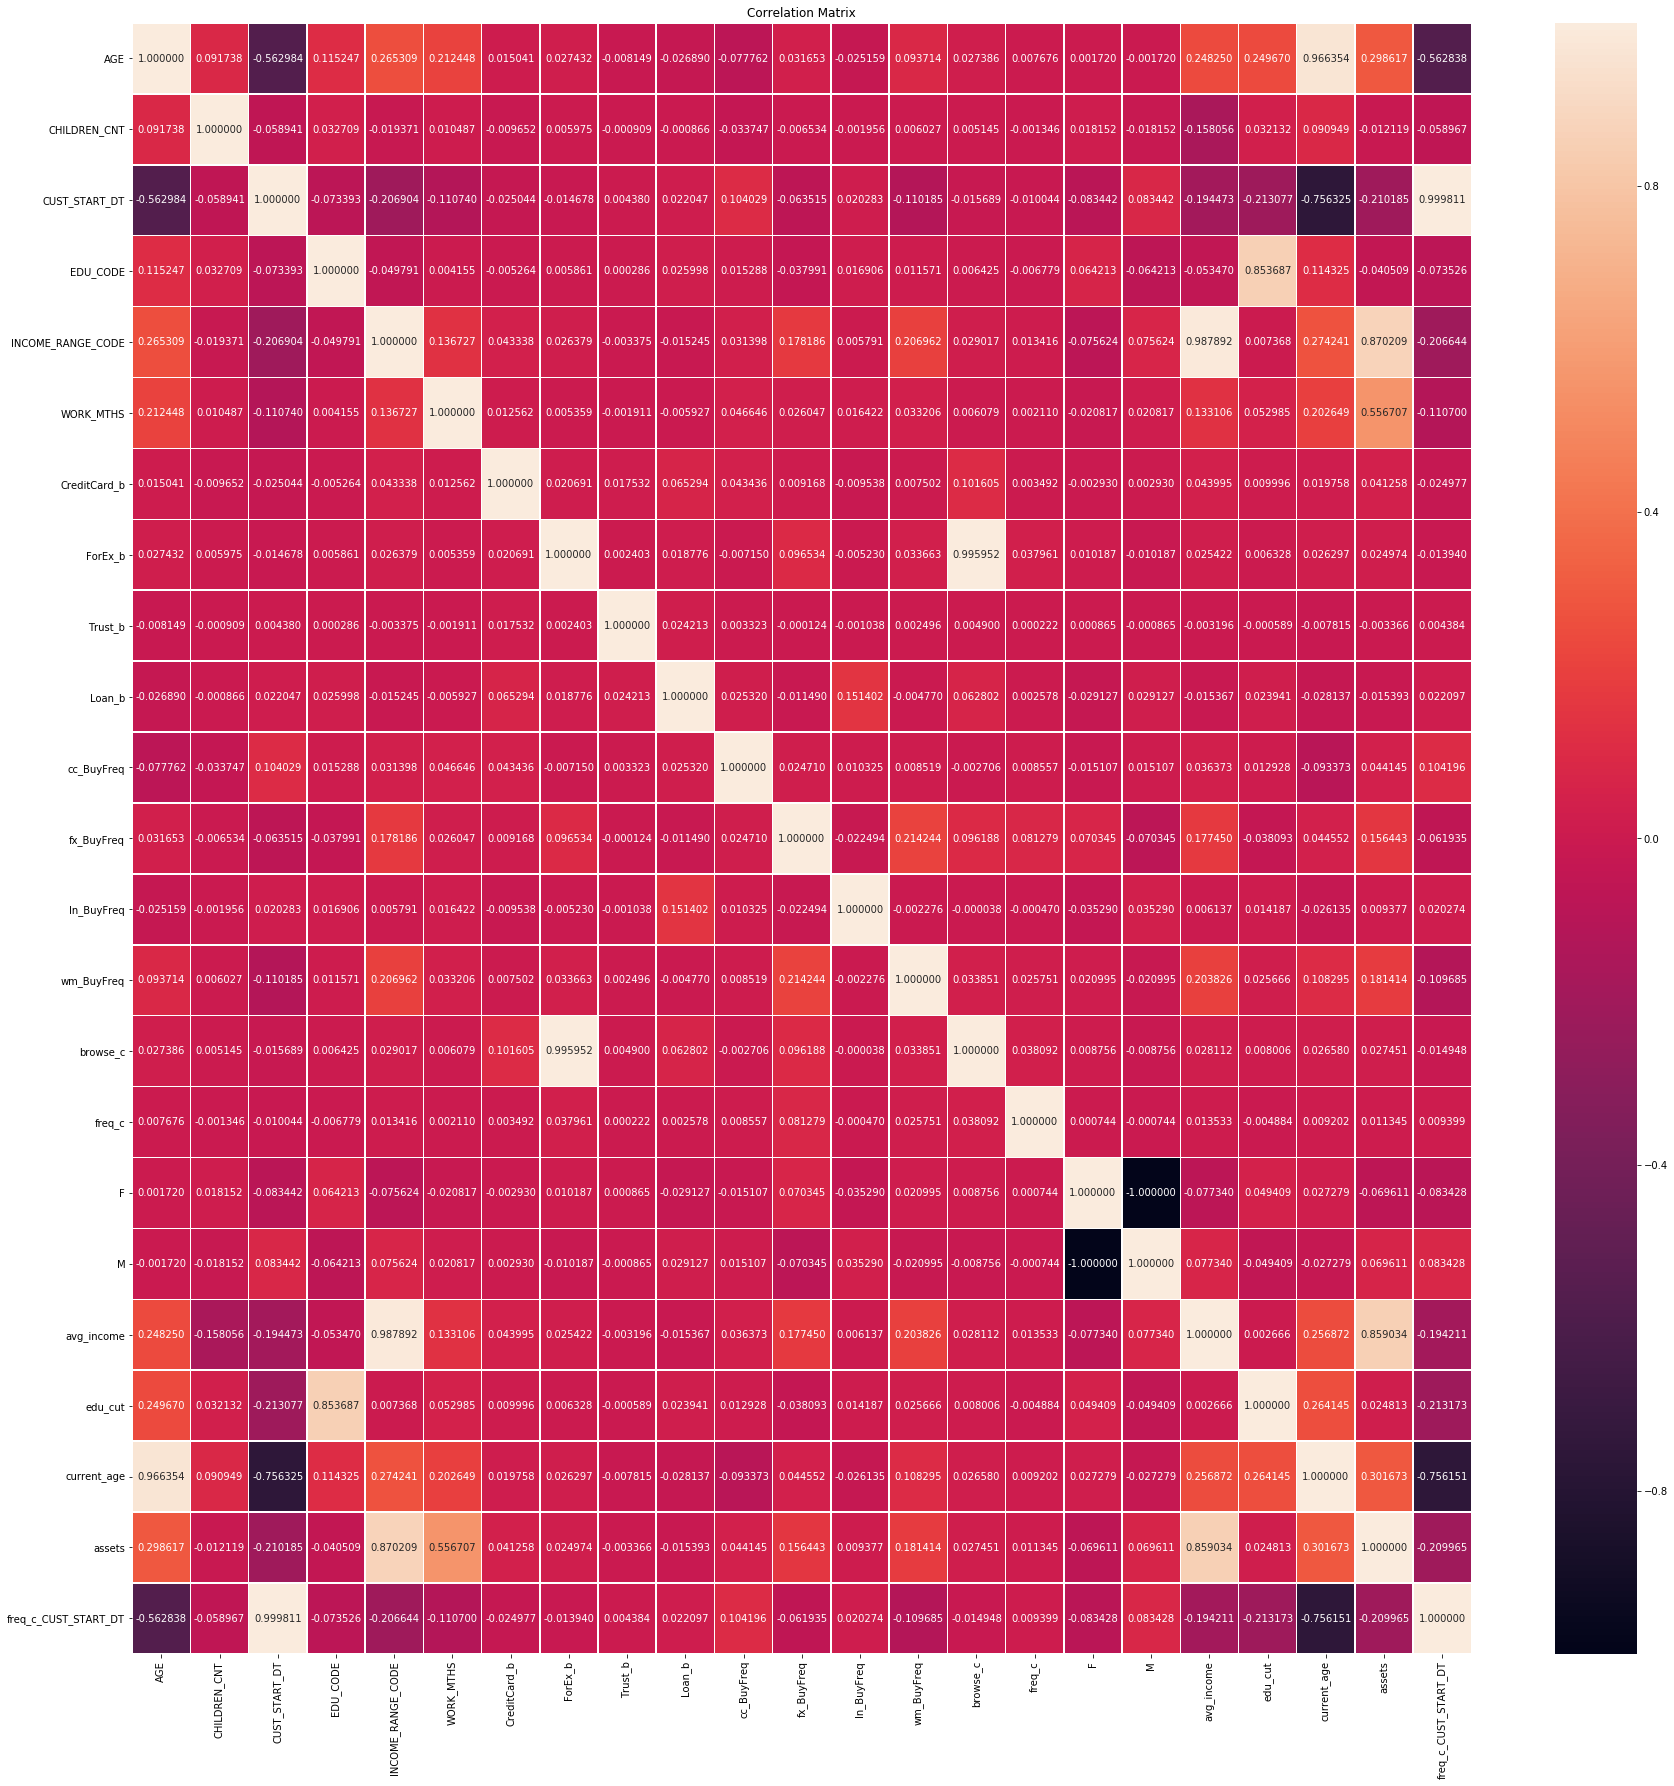

In [42]:
fig2,ax2=plt.subplots(figsize=(30,30))
ax2.set_title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.6f',ax=ax2)